In [3]:
version
whos
pwd

ans =
    '9.3.0.713579 (R2017b)'
  Name      Size            Bytes  Class    Attributes

  ans       1x21               42  char               

ans =
    '/home/giuliano/git/seminars/Siti_Contaminati'


## PARS

In [4]:
%% PARS
% working directory:
WDIR        = '/home/giuliano/work/Projects/terrafuochi';

% ******** E C O B A T ******** 
% DIR_EB      = '/media/DATI/db-backup/TerraDeiFuochi/Ecobat';
DIR_EB      = '/media/DATI/db-backup/TerraDeiFuochi/Ecobat/';
% ____ c o o r d i n a t e s    b o r e h o l e ____
FIL_EB_SHP  = fullfile( DIR_EB,'6 Suoli','Trivellate','TRIVELLATE'); %---OLD---% 
% ____ h e a v y  m e t a l s ____
FIL_EB_HMe  = fullfile( DIR_EB, 'Dati_ECOBAT_paperGEEA.xlsx' );
% ____ m e c h a n i c a l   i m p e d a n c e ____
FIL_EB_IMP  = fullfile( DIR_EB, '6 Suoli','Penetrometrie','ECOBAT_penetr.xls' );
% ____ g a m m a   r a y ____
FIL_EB_GAMRAY  = fullfile( DIR_EB, '5 Spettrometria Gamma','2.1 Dati Grezzi','2.1.2 Dati uniti','Ecobat_20151223_gamma_dose_rate.xlsx' );
% ____ d u a l e m ____
DIR_EB_DUA  = fullfile( DIR_EB, '2 DUALEM/2.1 Dati Grezzi/2.1.2 Dati Filtrati/' );
FIL_EB_DUA  = fullfile( DIR_EB_DUA, 'ECOBAT_20151031_DUALEM_cut.xlsx' );
% ____ a r p ____
DIR_EB_ARP  = fullfile( DIR_EB, '3 ARP/3.1 Dati Grezzi/3.1.2 Dati Filtrati/' );
FIL_EB_ARP  = fullfile( DIR_EB_ARP, 'ECOBAT_20151026_ARP_cut.xlsx' );
% ____ p r o f i l e r ____
DIR_EB_PROF = fullfile( DIR_EB, '4 Profiler/4.1 Dati Grezzi/4.1.2 Dati Filtrati' );
FIL_EB_PROF = fullfile( DIR_EB_PROF, 'ECOBAT_20151201_punti_PROFILER_cut.xlsx' );

% POSITION OF PLOTS ON SCREEN
%                   [left,  bottom, width,  height]
riquadri_2x3 = [    [20     30      560     420];
                    [700    30      560     420];
                    [1350   30      560     420]; 
                    [20     535     560     420]; 
                    [700    535     560     420]; 
                    [1350   535     560     420]; ];
                
% VIEW ANGLES:
VIEW = [0,90];%[10.5, 90];

% RESCALE VALUES ACCORDING TO A NEW RANGE:
% See --> http://stackoverflow.com/questions/5294955/how-to-scale-down-a-range-of-numbers-with-a-known-min-and-max-value
f           = @(x, a,b,min,max) ( ((b-a)*(x-min)) / (max-min) ) +a;
% where the new range is [ra,rb] for plotting purpose.
ra          = 1;
rb          = 30;

% FILTERING-OUT FUNCTION (values found with g() are filtered out)
%   -values outside the whiskers are set as NaN to turn off hot spot
g           = @(D) D<prctile(D,25)-1.5*iqr(D) | D>prctile(D,75)+1.5*iqr(D);

% Limitis by Law:
lexlimits  = { 'P',NaN,'S',NaN,'Cl',NaN,'K',NaN,'Ca',NaN,...
               'Ti',NaN,'V',90,'Cr',150,'Mn',NaN,'Fe',NaN,'Co',20,...
               'Ni',120,'Cu',120,'Zn',150,'As',20,'Se',3,'Rb',NaN,...
               'Sr',NaN,'Yel',NaN,'Zr',NaN,'Nb',NaN,'Mo',NaN,'Ag',NaN,...
               'Cd',2,'Sn',1,'Sb',10,'W',NaN,'Hg',1,'Pb',100,'Bi',NaN,...
               'Th',NaN,'U',NaN };

## Boreholes, shapefile | T

In [5]:
%% ECOBAT
%% - Boreholes coordinates
T               = shaperead( FIL_EB_SHP );

In [6]:
whos T

  Name        Size             Bytes  Class     Attributes

  T         121x1             101330  struct              



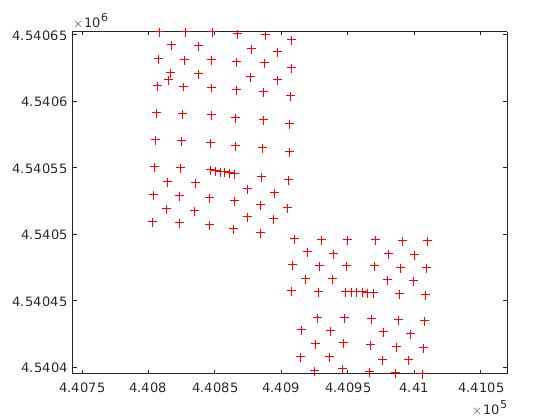

In [6]:
mapshow(T,'DisplayType','Point')
box on
axis equal

## Heavy Metals | hm_eb , X_pits , Y_pits

In [7]:
%% - Heavy Metals
[~,~,hm_eb] = xlsread( FIL_EB_HMe,4 );
X_pits      = cae(hm_eb,17);
Y_pits      = cae(hm_eb,18);
% Pb_L1       = cae(hm_eb,2);
% Pb_L2       = cae(hm_eb,7);
% Pb_wave     = cae(hm_eb,12);% weighted average!
% Sb_L1       = cae(hm_eb,3);
% Sb_L2       = cae(hm_eb,8);
% Sb_wave     = cae(hm_eb,13);% weighted average!
% Cd_L1       = cae(hm_eb,4);
% Cd_L2       = cae(hm_eb,9);
% Cd_wave     = cae(hm_eb,14);% weighted average!
% As_L1       = cae(hm_eb,5);
% As_L2       = cae(hm_eb,10);
% As_wave     = cae(hm_eb,15);% weighted average!

## Mechanical Impedance

#### load

In [8]:
%% - Mechanical impedance
%% --- load
% holes of impedance measurement:
[~,~,impedance] = xlsread( FIL_EB_IMP,'ECOBAT_penetr_adj' );
% depths within holes in which impedance is measured:
Idepths = cell2mat(impedance(3:end,1));

In [9]:
fieldnames(T)
impedance(1:6,1:3)

ans =
  7x1 cell array
    {'Geometry'}
    {'X'       }
    {'Y'       }
    {'F1'      }
    {'X1'      }
    {'Y1'      }
    {'NOTE'    }
ans =
  6x3 cell array
    {'Depth '}    {'A1'  }    {'A1'  }
    {[     0]}    {[   0]}    {[   0]}
    {[   -25]}    {[1877]}    {[1377]}
    {[   -50]}    {[3939]}    {[2453]}
    {[   -75]}    {[4401]}    {[3749]}
    {[  -100]}    {[1779]}    {[3840]}


#### join :: coord~impedance | ERR

In [10]:
%% --- join :: coord~impedance
% extract labels of boreholes:
Tnames = {T.F1}';
% check that labels are unique:
if length(unique(Tnames)) ~= length(Tnames)
    error('Distinct boreholes have the same label!')
end

% join by single borehole :: add every file to the SHP info
for ii = 1:length(Tnames)
    % counts the number of impedance measurements (holes)
    LIST = strcmp( impedance(1,:), Tnames{ii} );
    %fprintf('(%d,%d), ',ii,sum(LIST))
    if ~sum(LIST)% <-- no impedance measurement found for current borehole
        T(ii).('impedance_file_label') = 'void';
        T(ii).('impedance_file_data') = NaN(120,1);%NaN(size(Idepths));
        continue
    end
    % find position of current impedance "file" in impedance array
    FL = find(LIST);
    clear tmp tmp2
    tmp = NaN(120,1);                          %fprintf('(%d, ',numel(tmp))
    tmp2 = [cell2mat( impedance(2:end,FL) )]'; %fprintf('%d, ' ,numel(tmp2))
    tmp(1:numel(tmp2)) = tmp2;                 %fprintf('%d); ',numel(tmp))
    T(ii).('impedance_file_label')  = impedance(1,FL);
    T(ii).('impedance_file_data')   = tmp;
    T(ii).('impedance_file_depth')  = Idepths;
end
clear tmp tmp2

In [15]:
%for ii=1:length(Tnames), fprintf('%d, ',size(T(ii).impedance_file_data,1)); end
%size(T(30).impedance_file_data)
%T(29).impedance_file_data
%plot(T(29).impedance_file_data)
%tmp = [T.impedance_file_data];
%plot(tmp)
%size(Iview)
%size([T.X])
%size(Xm)
%size(Ym)
%size(Zm)
%length(T)
%size(Idepths)

#### explore impedance | ERR

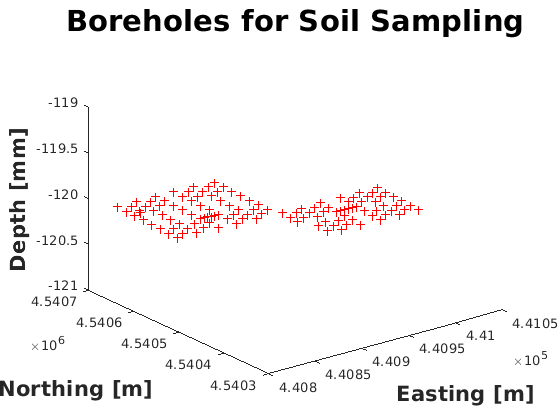

In [21]:
%% --- explore impedance

iTolle = 10d-4;

% I assume that the first impedance hole is the reference, for now:
%   (I can also take the mean value of multiple holes)
%Iview = nan( size(Idepths,1),length(T) );
Iview = nan( 120,length(T) );
for ii = 1:numel(T)
    Iview(:,ii) = T(ii).impedance_file_data(:,1);
end
Iview(Iview==0) = NaN;

% CORRECTION FOR PLOT PURPOSE
% Iview(Iview==0) = iTolle;

[Xm,Zm]     = meshgrid( [T.X], 120);%Idepths);
[Ym,Zm]     = meshgrid( [T.Y], 120);%Idepths);

% Fnan        = isnan( Iview );
% Xm(Fnan)    = [];
% Ym(Fnan)    = [];
% Zm(Fnan)    = [];
% Iview(Fnan) = [];

figure(11), hS3 = plot3( Xm(:), Ym(:), -Zm(:), 'r+' );
title('Boreholes for Soil Sampling','FontWeight','b','FontSize',22)
xlabel('Easting [m]','FontWeight','b','FontSize',16),
ylabel('Northing [m]','FontWeight','b','FontSize',16),
zlabel('Depth [mm]','FontWeight','b','FontSize',16)

%figure(33)
%scatter3( Xm(:), Ym(:), -Zm(:), Iview(:)/50, Iview(:), 'filled' )
% hS3_2 = plot3( Xm(:), Ym(:), -Zm(:), 'LineStyle', 'none', ...
%           'Marker','o', 'MarkerEdgeColor', 'g', 'MarkerFaceColor','g', 'MarkerSize', 10);
%colormap(cool(32)), colorbar
%title('Boreholes for Soil Sampling','FontWeight','b','FontSize',22)
%xlabel('Easting [m]','FontWeight','b','FontSize',16),
%ylabel('Northing [m]','FontWeight','b','FontSize',16),
%zlabel('Depth [mm]','FontWeight','b','FontSize',16)

#### save

In [ ]:
%% --- save T
%save( fullfile(WDIR,'geotables.mat'), 'T', '-append' )

## $\gamma-ray$

#### load

In [16]:
%% - GAMMA RAY
%% --- load
[~,~,eb_gamray] = xlsread( FIL_EB_GAMRAY, 'Sheet1', 'A1:E82' );
COLH_eb_gamray = eb_gamray(1,:);
display(COLH_eb_gamray)
display(eb_gamray(2,:))

COLH_eb_gamray =
  1x5 cell array
    {'punto'}    {'X'}    {'Y'}    {'Count'}    {'DoseRate'}
  1x5 cell array
    {'A1'}    {[440808.012214]}    {[4540652.698874]}    {[45.53]}    {[98.21]}


#### extract

In [17]:
%% --- extract
% coordinates
X = cae(eb_gamray,2);
Y = cae(eb_gamray,3);

% find fields with gamma ray spectrometry
LABELS = {'Count','DoseRate'};
UNITS = {'[-]','[nGy h^-1]'};
FGRAY(1) = find( strcmp(COLH_eb_gamray(1,:), LABELS{1}) );
FGRAY(2) = find( strcmp(COLH_eb_gamray(1,:), LABELS{2}) );
display( COLH_eb_gamray(1,FGRAY)' )
GRAY = cae(eb_gamray,FGRAY);
head(GRAY)

  2x1 cell array
    {'Count'   }
    {'DoseRate'}
                     45.53                     98.21
                     48.33                    104.25
                      48.8                    105.25
                      49.2                    106.12


#### view ~Spectrometry

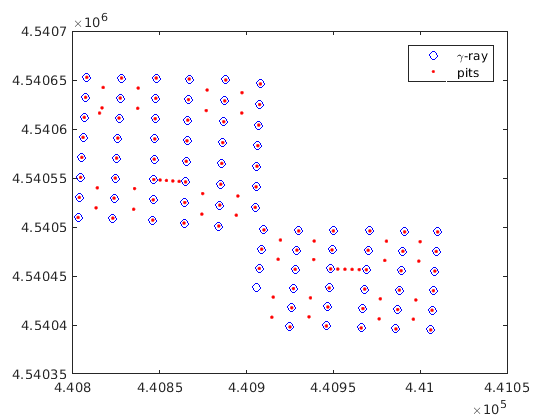

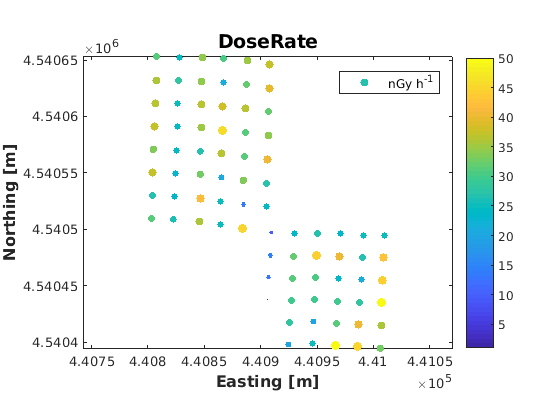

In [22]:
%% --- view ~Spectrometry

% GRAY_F     = GRAY;
% for ii = 1:size(GRAY,2)
%     GRAY_F( g(GRAY(:,ii)), ii ) = NaN;
% end

GRAY_plot     = GRAY;
% GRAY_F_plot   = GRAY_F;

for ii = 1:size(GRAY,2)
    GRAY_plot(:,ii) = f( GRAY(:,ii), ra,50,  min(GRAY(:,ii)),max(GRAY(:,ii)) );
%     GRAY_F_plot(:,ii) = f( GRAY_F(:,ii), ra,rb,  min(GRAY_F(:,ii)),max(GRAY_F(:,ii)) );
end

for ii = 2:size(GRAY,2) % 1:size(GRAY,2)
    hxx = figure;% RAW
    hold on
    scatter3( X, Y,  +GRAY(:,ii),  GRAY_plot(:,ii),  GRAY_plot(:,ii), 'filled' ) % Dose rate
    %scatter3( Xm(:), Ym(:), -Zm(:), 'r+' ) % location of pits
    title(COLH_eb_gamray(FGRAY(ii)),'FontWeight','b','FontSize',14, 'Interpreter','none')
    set(hxx,'Position',riquadri_2x3(ii,:))
    view(VIEW) % view([10.5, 25])
    xlabel('Easting [m]','FontWeight','b','FontSize',12),
    ylabel('Northing [m]','FontWeight','b','FontSize',12),
    zlabel(['Value ',UNITS{ii}],'FontWeight','b','FontSize',12)
    hold off
    box on
    axis equal
    colorbar
    legend('nGy h^{-1}')
%     hyy = figure;% FILTERED
%     scatter3( X, Y,  +GRAY_F(:,ii),  GRAY_F_plot(:,ii),  GRAY_F_plot(:,ii), 'filled' )
%     title({COLH_sg_gamray{FGRAY(ii)};'FILTERED'},'FontWeight','b','FontSize',14, 'Interpreter','none')
%     set(hyy,'Position',[riquadri_2x3(ii,:) + [0 520 0 0]])
%     view(VIEW)
%     xlabel('Easting [m]','FontWeight','b','FontSize',12),
%     ylabel('Northing [m]','FontWeight','b','FontSize',12),
%     zlabel('Value [?]','FontWeight','b','FontSize',12)
end
figure,hold on
scatter3( X, Y,  +GRAY(:,ii),  'bo' ) % Dose rate
scatter3( Xm(:), Ym(:), -Zm(:), 'r.' ) % location of pits
view(VIEW)
hold off
box on
legend('\gamma-ray','pits')

## PROFILER

#### load

In [23]:
%% - PROFILER
%% --- load
[~,~,eco_prof] = xlsread( FIL_EB_PROF );
COLH_eco_prof = eco_prof(1,:);

#### extract :: COND , COND_F

In [24]:
%% --- extract
% coordinates
X_prof = cae(eco_prof,1);
Y_prof = cae(eco_prof,2);

% find fields with conductivity:
Fcond = find( strncmpi(COLH_eco_prof(1,:), 'eca', length('eca')) );
fprintf('\n%s\n','Find fields with conductivity:')
display( COLH_eco_prof(1,Fcond)' )
COND = cae(eco_prof,Fcond);

% find fields with susceptibility:
Fsusc = find( strncmpi(COLH_eco_prof(1,:), 'suscept', length('suscept')) );
fprintf('\n%s\n','Find fields with susceptibility:')
display( COLH_eco_prof(1,Fsusc)' )
SUSC = cae(eco_prof,Fsusc);

COND_F     = COND;
for ii = 1:size(COND,2)
    COND_F( g(COND(:,ii)), ii ) = NaN;
end


Find fields with conductivity:
  3x1 cell array
    {'Eca_15KHz'}
    {'Eca_10KHz'}
    {'Eca_7KHz' }

Find fields with susceptibility:
  3x1 cell array
    {'Suscept_15KHz'}
    {'Suscept_10KHz'}
    {'Suscept_7KHz' }


#### view ~Conductivities

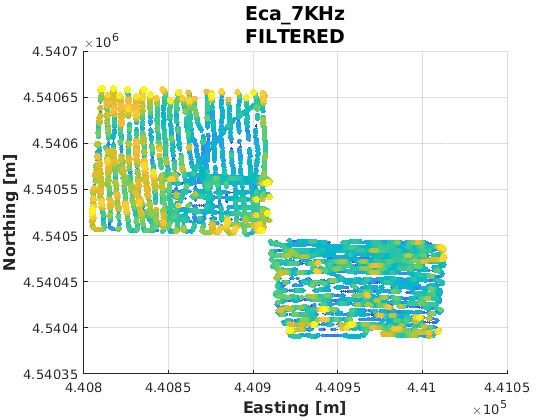

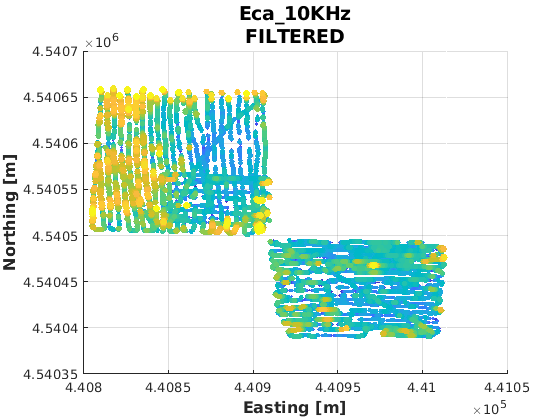

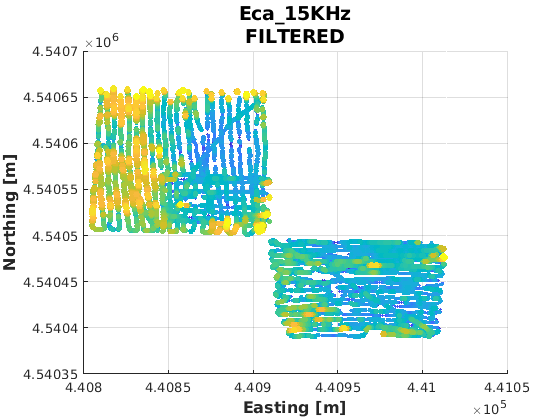

In [13]:
%% --- view ~Conductivities
COND_plot     = COND;
COND_F_plot   = COND_F;

for ii = 1:size(COND,2)
    COND_plot(:,ii) = f( COND(:,ii), ra,rb,  min(COND(:,ii)),max(COND(:,ii)) );
    COND_F_plot(:,ii) = f( COND_F(:,ii), ra,rb,  min(COND_F(:,ii)),max(COND_F(:,ii)) );
end

for ii = 1:size(COND,2)
%    hxx = figure;% RAW
%    scatter3( X_prof, Y_prof,  +COND(:,ii),  COND_plot(:,ii),  COND_plot(:,ii), 'filled' )
%    title({COLH_eco_prof{Fcond(ii)};'RAW'},'FontWeight','b','FontSize',14, 'Interpreter','none')
%    set(hxx,'Position',riquadri_2x3(ii,:))
%    view(VIEW)
%    xlabel('Easting [m]','FontWeight','b','FontSize',12),
%    ylabel('Northing [m]','FontWeight','b','FontSize',12),
%    zlabel('Value [?]','FontWeight','b','FontSize',12)

    hyy = figure;% FILTERED
    scatter3( X_prof, Y_prof,  +COND_F(:,ii),  COND_F_plot(:,ii),  COND_F_plot(:,ii), 'filled' )
    title({COLH_eco_prof{Fcond(ii)};'FILTERED'},'FontWeight','b','FontSize',14, 'Interpreter','none')
    set(hyy,'Position',[riquadri_2x3(ii,:) + [0 520 0 0]])
    view(VIEW)
    xlabel('Easting [m]','FontWeight','b','FontSize',12),
    ylabel('Northing [m]','FontWeight','b','FontSize',12),
    zlabel('Value [?]','FontWeight','b','FontSize',12)
end

% h55 = figure(55);
% scatter3( profiler(:,1), profiler(:,2),  profiler(:,Fcond(2)),  profiler(:,Fcond(2)),  profiler(:,Fcond(2)), 'filled' )
% title(COLH_profiler(Fcond(2)),'FontWeight','b','FontSize',14)
% set(h55,'Position',[20    27   560   420])
% view(VIEW)
% 
% h56 = figure(56);
% scatter3( profiler(:,1), profiler(:,2),  profiler(:,Fcond(1)),  profiler(:,Fcond(1)),  profiler(:,Fcond(1)), 'filled' )
% title(COLH_profiler(Fcond(1)),'FontWeight','b','FontSize',14)
% set(h56,'Position',[670    27   560   420])
% view(VIEW)
% 
% h57 = figure(57);
% scatter3( profiler(:,1), profiler(:,2),  profiler(:,Fcond(3)),  profiler(:,Fcond(3)),  profiler(:,Fcond(3)), 'filled' )
% title(COLH_profiler(Fcond(3)),'FontWeight','b','FontSize',14)
% set(h57,'Position',[1354   28   560   420])
% view(VIEW)

#### save ~Conductivities

In [ ]:
%% --- save ~Conductivities
%save( fullfile(DIR_EB, 'ECOBAT_prof_filt.txt'), 'COND_F', '-ascii' )

#### view ~Susceptibilities

In [16]:
%% --- view ~Susceptibilities
%h58 = figure(58);
%scatter3( X_prof, Y_prof,  eco_prof(:,Fsusc(2)),  eco_prof(:,Fsusc(2)),  eco_prof(:,Fsusc(2)), 'filled' )
%title(COLH_profiler(Fsusc(2)),'FontWeight','b','FontSize',14)
%set(h58,'Position',[20   554   560   420])
%view(VIEW)
% colorbar

%h59 = figure(59);
%scatter3( eco_prof(:,1), eco_prof(:,2),  eco_prof(:,Fsusc(1)),  eco_prof(:,Fsusc(1)),  eco_prof(:,Fsusc(1)), 'filled' )
%title(COLH_profiler(Fsusc(1)),'FontWeight','b','FontSize',14)
%set(h59,'Position',[670   554   560   420])
%view(VIEW)

%h60 = figure(60);
%scatter3( eco_prof(:,1), eco_prof(:,2),  eco_prof(:,Fsusc(3)),  eco_prof(:,Fsusc(3)),  eco_prof(:,Fsusc(3)), 'filled' )
%title(COLH_profiler(Fsusc(3)),'FontWeight','b','FontSize',14)
%set(h60,'Position',[1354   554   560   420])
%view(VIEW)

## GEOCARTA

### DUALEM

#### load

In [25]:
%% - GEOCARTA
%% -- DUALEM
%% --- load
[~,~,dualem] = xlsread( FIL_EB_DUA );
COLH_eco_dualem = dualem(1,:);

#### extract :: RESIS , RESIS_F

In [26]:
%% --- extract
% coordinates
X_dual = cae(dualem,1);
Y_dual = cae(dualem,2);

% find fields with resistivity
Fres_D = find( strncmpi(COLH_eco_dualem(1,:), 'rho', length('rho')) );
% Fres_D = find( strncmpi(COLH_dualem(1,:), 'rho', length('rho')) );
display( COLH_eco_dualem(1,Fres_D)' )
RESIS = cae(dualem,Fres_D);

Fsusc_D = find( strncmpi(COLH_eco_dualem(1,:), 'suscep', length('suscep')) );
display( COLH_eco_dualem(1,Fsusc_D)' )
SUSC_D = cae(dualem,Fsusc_D);

RESIS_F     = RESIS;
for ii = 1:size(RESIS,2)
    RESIS_F( g(RESIS(:,ii)), ii ) = NaN;
end

  6x1 cell array
    {'Rho_PRP2_DOE1.0m'}
    {'Rho_PRP4_DOE2.0m'}
    {'Rho_PRP6_DOE3.0m'}
    {'Rho_HCP2_DOE3.2m'}
    {'Rho_HCP4_DOE6.4m'}
    {'Rho_HCP6_DOE9.5m'}
  6x1 cell array
    {'Suscep_PRP2'}
    {'Suscep_PRP4'}
    {'Suscep_PRP6'}
    {'Suscep_HCP2'}
    {'Suscep_HCP4'}
    {'Suscep_HCP6'}


#### view ~Resistivities

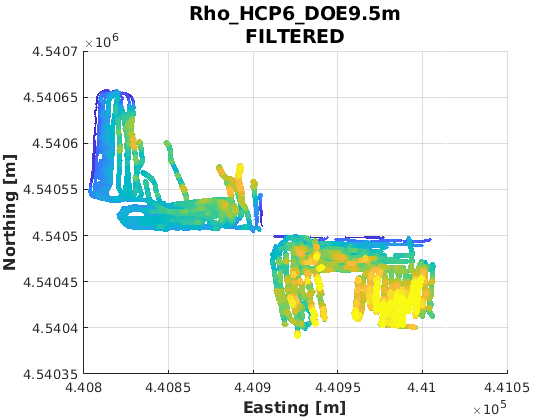

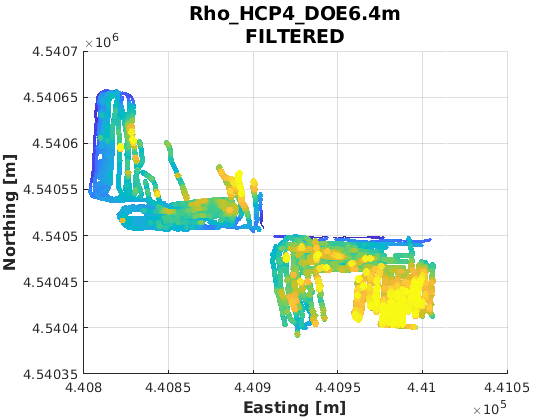

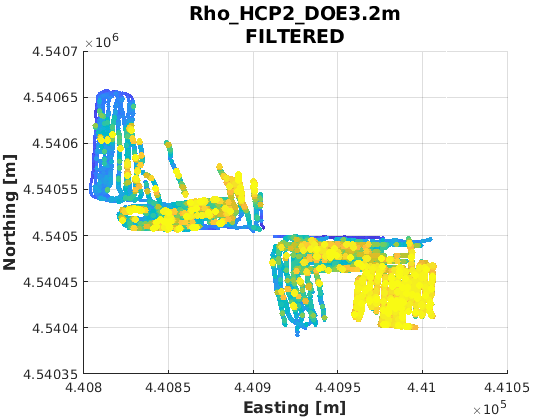

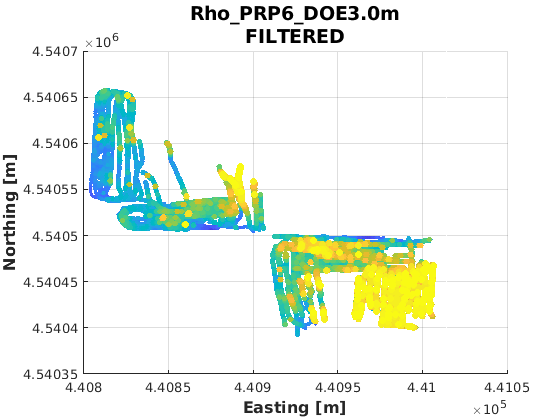

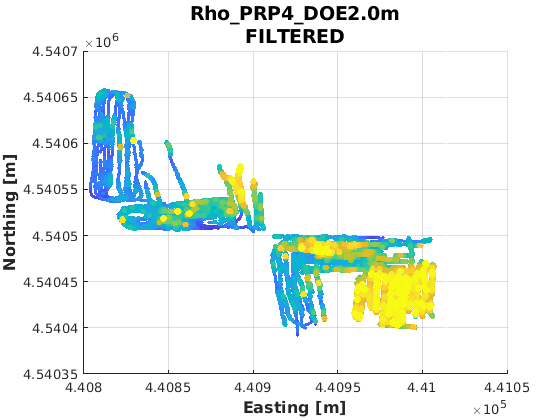

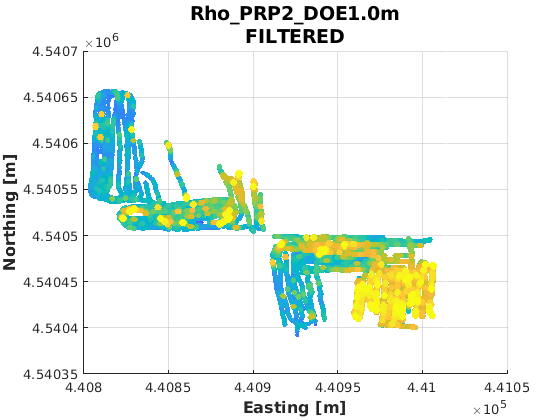

In [20]:
%% --- view ~Resistivities

% % The new range is [ra,rb] for plotting purpose.
% ra=1;
% rb=30;

RESIS_plot     = RESIS;
RESIS_F_plot   = RESIS_F;

for ii = 1:size(SUSC_D,2)
    RESIS_plot(:,ii)   = f( RESIS(:,ii), ra,rb,  min(RESIS(:,ii)),max(RESIS(:,ii)) );
    RESIS_F_plot(:,ii) = f( RESIS_F(:,ii), ra,rb,  min(RESIS_F(:,ii)),max(RESIS_F(:,ii)) );
end

for ii = 1:size(RESIS,2)
    %hxx = figure;% RAW
    %scatter3( X_dual, Y_dual,  +RESIS(:,ii),  RESIS_plot(:,ii),  RESIS_plot(:,ii), 'filled' )
    %title(COLH_eco_dualem(Fres_D(ii)),'FontWeight','b','FontSize',14, 'Interpreter','none')
%     set(hxx,'Position',[100*ii  30*ii   560   420])
    %set(hxx,'Position',riquadri_2x3(ii,:))
    %view(VIEW)
    %xlabel('Easting [m]','FontWeight','b','FontSize',12),
    %ylabel('Northing [m]','FontWeight','b','FontSize',12),
    %zlabel('Value [?]','FontWeight','b','FontSize',12)

    hyy = figure;% FILTERED
    scatter3( X_dual, Y_dual,  +RESIS_F(:,ii),  RESIS_F_plot(:,ii),  RESIS_F_plot(:,ii), 'filled' )
    title({COLH_eco_dualem{Fres_D(ii)};'FILTERED'},'FontWeight','b','FontSize',14, 'Interpreter','none')
    set(hyy,'Position',[riquadri_2x3(ii,:) + [30 20 0 0]])
    view(VIEW)
    xlabel('Easting [m]','FontWeight','b','FontSize',12),
    ylabel('Northing [m]','FontWeight','b','FontSize',12),
    zlabel('Value [?]','FontWeight','b','FontSize',12)    
%     hyy = figure;% FILTERED
%     scatter3( dualem(2:end,1), dualem(2:end,2),  -RESIS(:,ii),  RESIS_plot(:,ii),  RESIS_plot(:,ii), 'filled' )
%     title(COLH_dualem(Fres_D(ii)),'FontWeight','b','FontSize',14, 'Interpreter','none')
%     set(hyy,'Position',[670    27   560   420])
%     view(VIEW)
end

#### save ~Resistivities

In [10]:
%% --- save ~Resistivities
%save( fullfile(DIR_EB, 'ECOBAT_dualem_filt.txt'), 'RESIS_F', '-ascii' )

#### view ~Succeptibilities

In [ ]:
%% --- view ~Succeptibilities

% The new range is [ra,rb] for plotting purpose.
% ra=0;
% rb=30;

SUSC_D_F     = SUSC_D;
for ii = 1:size(SUSC_D,2)
    SUSC_D_F( g(SUSC_D(:,ii)), ii ) = NaN;
end

SUSC_D_plot     = SUSC_D;
SUSC_D_F_plot   = SUSC_D_F;

for ii = 1:size(SUSC_D,2)
    SUSC_D_plot(:,ii)   = f( SUSC_D(:,ii), ra,rb,  min(SUSC_D(:,ii)),max(SUSC_D(:,ii)) );
    SUSC_D_F_plot(:,ii) = f( SUSC_D_F(:,ii), ra,rb,  min(SUSC_D_F(:,ii)),max(SUSC_D_F(:,ii)) );
end

for ii = 1:size(SUSC_D,2)
    hxx = figure;% RAW
    scatter3( dualem(2:end,1), dualem(2:end,2),  +SUSC_D(:,ii),  SUSC_D_plot(:,ii),  SUSC_D_plot(:,ii), 'filled' )
    title(COLH_eco_dualem(Fsusc_D(ii)),'FontWeight','b','FontSize',14, 'Interpreter','none')
    set(hxx,'Position',riquadri_2x3(ii,:))
    view(VIEW)
    xlabel('Easting [m]','FontWeight','b','FontSize',12),
    ylabel('Northing [m]','FontWeight','b','FontSize',12),
    zlabel('Value [?]','FontWeight','b','FontSize',12)

    hyy = figure;% FILTERED
    scatter3( dualem(2:end,1), dualem(2:end,2),  +SUSC_D_F(:,ii),  SUSC_D_F_plot(:,ii),  SUSC_D_F_plot(:,ii), 'filled' )
    title({COLH_eco_dualem{Fsusc_D(ii)};'FILTERED'},'FontWeight','b','FontSize',14, 'Interpreter','none')
    set(hyy,'Position',[riquadri_2x3(ii,:) + [30 20 0 0]])
    view(VIEW)
    xlabel('Easting [m]','FontWeight','b','FontSize',12),
    ylabel('Northing [m]','FontWeight','b','FontSize',12),
    zlabel('Value [?]','FontWeight','b','FontSize',12)
end

### ARP

#### load

In [27]:
%% -- ARP
%% --- load
[~,~,arp] = xlsread( FIL_EB_ARP );
COLH_arp = arp(1,:);

#### extract :: VOIE , VOIE_F

In [28]:
%% --- extract
% coordinates
X_arp = cae(arp,1);
Y_arp = cae(arp,2);

% find fields with resistivity
Fvoie = find( strncmpi(COLH_arp(1,:), 'voie', length('voie')) );
display( COLH_arp(1,Fvoie)' )
VOIE = cae(arp,Fvoie);

VOIE_F     = VOIE;
for ii = 1:size(VOIE,2)
    VOIE_F( g(VOIE(:,ii)), ii ) = NaN;
end

  3x1 cell array
    {'voie_1'}
    {'voie_2'}
    {'voie_3'}


#### view ~Resistivities

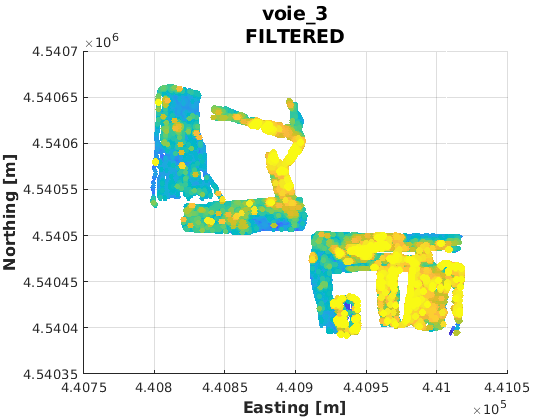

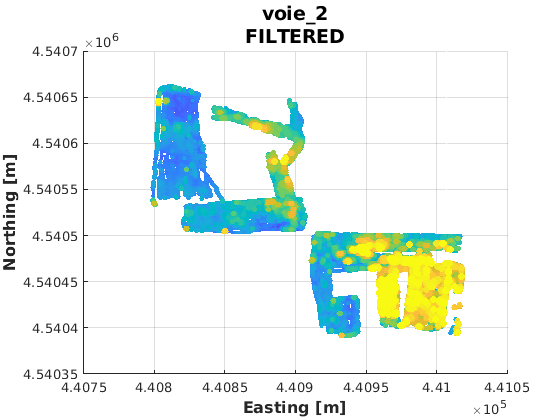

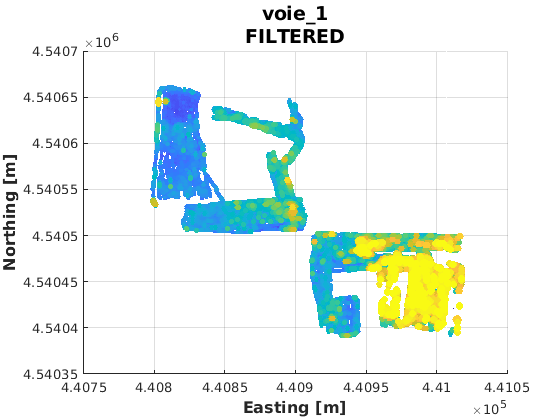

In [29]:
%% --- view ~Resistivities

% The new range is [ra,rb] for plotting purpose.
% ra=0;
% rb=30;

VOIE_plot = VOIE;
VOIE_F_plot = VOIE_F;

for ii = 1:size(VOIE,2)
    VOIE_plot(:,ii) = f( VOIE(:,ii), ra,rb,  min(VOIE(:,ii)),max(VOIE(:,ii)) );
    VOIE_F_plot(:,ii) = f( VOIE_F(:,ii), ra,rb,  min(VOIE_F(:,ii)),max(VOIE_F(:,ii)) );
end

for ii = 1:size(VOIE,2)
    %hxx = figure;% RAW
    %scatter3( X_arp, Y_arp,  -VOIE(:,ii),  VOIE_plot(:,ii),  VOIE_plot(:,ii), 'filled' )
    %title(COLH_arp(Fvoie(ii)),'FontWeight','b','FontSize',14, 'Interpreter','none')
%     set(hxx,'Position',[100*ii  30*ii   560   420])
    %set(hxx,'Position',riquadri_2x3(ii,:))
    %view(VIEW)
    %xlabel('Easting [m]','FontWeight','b','FontSize',12),
    %ylabel('Northing [m]','FontWeight','b','FontSize',12),
    %zlabel('Value [?]','FontWeight','b','FontSize',12)

    hyy = figure;% FILTERED
    scatter3( X_arp, Y_arp,  +VOIE_F(:,ii),  VOIE_F_plot(:,ii),  VOIE_F_plot(:,ii), 'filled' )
    title({COLH_arp{Fres_D(ii)};'FILTERED'},'FontWeight','b','FontSize',14, 'Interpreter','none')
    %set(hyy,'Position',[riquadri_2x3(ii,:) + [30 20 0 0]])
    set(hyy,'Position',[riquadri_2x3(ii,:) + [0 520 0 0]])
    view(VIEW)
    xlabel('Easting [m]','FontWeight','b','FontSize',12),
    ylabel('Northing [m]','FontWeight','b','FontSize',12),
    zlabel('Value [?]','FontWeight','b','FontSize',12)    
end

#### save ~Resistivities

In [ ]:
%% --- save ~Resistivities
%save( fullfile(DIR_EB, 'ECOBAT_arp_filt.txt'), 'VOIE_F', '-ascii' )

## CORRELATIONS

### using Euclidean dist between pits and geophysics

#### {'Pb','Sb','Cd','As'} vs {profiler | conductivity}

In [33]:
%% - correlation :: heavy metals (4) vs geophysics
%% -- {'Pb','Sb','Cd','As'} vs {profiler | conductivity}
% Pb : Piombo
% Sb : Antimonio
% Cd : Cadmio
% As : Arsenico

% Compute euclidean distance between the two datasets:
D_pits_prof = distmat([X_pits,Y_pits],[X_prof,Y_prof]);

% % check the goodness of the distmat function:
% sqrt( (X_pits(1)-X_prof(1))^2 + (Y_pits(1)-Y_prof(1))^2 )
% D_pits_prof(1,1)% --> ok!!
% sqrt( (X_pits(120)-X_prof(6609))^2 + (Y_pits(120)-Y_prof(6609))^2 )
% D_pits_prof(120,6609)% --> ok!!

[~,Fprof] = min(D_pits_prof,[],2);
% check that Fprof does not have duplicated PROFILER POINTS to represent
% measurement pits.
% numel(unique(Fprof))
% numel(X_pits)

% conductivity RAW { COND } -                                 L1       L2        weighted-ave
[C_pitsR_prof,P_pitsR_prof] = corr( COND(Fprof,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( COND(Fprof,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

% conductivity FILTERED { COND_F }
[C_pitsF_prof,P_pitsF_prof] = corr( COND_F(Fprof,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( COND_F(Fprof,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

In [16]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t conductivity RAW { COND }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_eco_prof{1,Fcond})
for ii=1:size(C_pitsR_prof,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsR_prof(:,ii))
end

_______________________________________________________
	 conductivity RAW { COND }
_______________________________________________________
 METAL,  LAYER,   Eca_15KHz,   Eca_10KHz,    Eca_7KHz
    Pb,     L1,      0.0860,      0.0445,      0.0155
    Sb,     L1,      0.0912,      0.0511,      0.0456
    Cd,     L1,      0.0723,      0.0168,     -0.0160
    As,     L1,      0.1000,      0.0345,      0.0352
    Pb,     L2,      0.1655,      0.0669,      0.0370
    Sb,     L2,      0.1617,      0.0797,      0.0538
    Cd,     L2,      0.1632,      0.0562,      0.0247
    As,     L2,      0.1827,      0.0695,      0.0544
    Pb,   WAve,      0.1537,      0.0653,      0.0331
    Sb,   WAve,      0.1511,      0.0764,      0.0551
    Cd,   WAve,      0.1473,      0.0483,      0.0142
    As,   WAve,      0.1676,      0.0626,      0.0515


In [17]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t conductivity FILTERED { COND_F }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_eco_prof{1,Fcond})
for ii=1:size(C_pitsF_prof,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsF_prof(:,ii))
end

_______________________________________________________
	 conductivity FILTERED { COND_F }
_______________________________________________________
 METAL,  LAYER,   Eca_15KHz,   Eca_10KHz,    Eca_7KHz
    Pb,     L1,      0.0119,     -0.0238,      0.0182
    Sb,     L1,      0.0502,     -0.0117,      0.0319
    Cd,     L1,     -0.0192,      0.0042,     -0.0114
    As,     L1,      0.0665,     -0.0092,      0.0325
    Pb,     L2,      0.2014,      0.1191,      0.0880
    Sb,     L2,      0.1993,      0.1151,      0.0504
    Cd,     L2,      0.2145,      0.2404,      0.1638
    As,     L2,      0.2405,      0.1887,      0.1417
    Pb,   WAve,      0.1570,      0.0823,      0.0728
    Sb,   WAve,      0.1666,      0.0831,      0.0484
    Cd,   WAve,      0.1592,      0.1855,      0.1221
    As,   WAve,      0.2007,      0.1373,      0.1156


#### {'Pb','Sb','Cd','As'} vs {dualem   | resistivity}

In [34]:
%% -- {'Pb','Sb','Cd','As'} vs {dualem   | resistivity}

% Compute euclidean distance between the two datasets:
D_pits_dual = distmat([X_pits,Y_pits],[X_dual,Y_dual]);

% % check the goodness of the distmat function:
% sqrt( (X_pits(1)-X_dual(1))^2 + (Y_pits(1)-Y_dual(1))^2 )
% D_pits_dual(1,1)% --> ok!!
% sqrt( (X_pits(120)-X_dual(6609))^2 + (Y_pits(120)-Y_dual(6609))^2 )
% D_pits_dual(120,6609)% --> ok!!

[~,Fdual] = min(D_pits_dual,[],2);
% check that Fdual does not have duplicated DUALEM POINTS to represent
% measurement pits.
% numel(unique(Fdual))
% numel(X_pits)

% resistivity RAW { RESIS } -                                  L1       L2        weighted-ave
[C_pitsR_dual,P_pitsR_dual] = corr( RESIS(Fdual,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( RESIS(Fdual,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

% resistivity FILTERED { RESIS_F }
[C_pitsF_dual,P_pitsF_dual] = corr( RESIS_F(Fdual,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( RESIS_F(Fdual,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )
% NOTES: Correlations between the DUALEM Resistivity and the concentrations
% of heavy metals are higher using the most surficial signal (i.e.
% Rho_PRP2_DOE1.0m). This way we exclude other frequencies from the
% statistical analysis because they are intercorrelated.


In [19]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,130);
fprintf('%s\n\t resistivity RAW { RESIS }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %17s, %17s, %17s, %17s, %17s, %17s\n','METAL','LAYER',COLH_eco_dualem{1,Fres_D})
for ii=1:size(C_pitsR_dual,2)
    fprintf('%6s, %6s, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsR_dual(:,ii))
end

__________________________________________________________________________________________________________________________________
	 resistivity RAW { RESIS }
__________________________________________________________________________________________________________________________________
 METAL,  LAYER,  Rho_PRP2_DOE1.0m,  Rho_PRP4_DOE2.0m,  Rho_PRP6_DOE3.0m,  Rho_HCP2_DOE3.2m,  Rho_HCP4_DOE6.4m,  Rho_HCP6_DOE9.5m
    Pb,     L1,           -0.1753,           -0.2044,           -0.2205,           -0.1550,           -0.0683,           -0.0494
    Sb,     L1,           -0.2004,           -0.2135,           -0.2230,           -0.1611,           -0.0763,           -0.0584
    Cd,     L1,           -0.1031,           -0.1214,           -0.1397,           -0.1505,           -0.0039,           -0.0122
    As,     L1,           -0.1973,           -0.2192,           -0.2279,           -0.1596,           -0.0625,           -0.0487
    Pb,     L2,           -0.1560,           -0.2112,           -

In [20]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,130);
fprintf('%s\n\t resistivity FILTERED { RESIS_F }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %17s, %17s, %17s, %17s, %17s, %17s\n','METAL','LAYER',COLH_eco_dualem{1,Fres_D})
for ii=1:size(C_pitsF_dual,2)
    fprintf('%6s, %6s, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsF_dual(:,ii))
end

__________________________________________________________________________________________________________________________________
	 resistivity FILTERED { RESIS_F }
__________________________________________________________________________________________________________________________________
 METAL,  LAYER,  Rho_PRP2_DOE1.0m,  Rho_PRP4_DOE2.0m,  Rho_PRP6_DOE3.0m,  Rho_HCP2_DOE3.2m,  Rho_HCP4_DOE6.4m,  Rho_HCP6_DOE9.5m
    Pb,     L1,           -0.2934,           -0.2619,           -0.2998,           -0.0203,           -0.0334,           -0.0556
    Sb,     L1,           -0.2742,           -0.2379,           -0.2614,           -0.0616,           -0.0232,           -0.0571
    Cd,     L1,           -0.2936,           -0.1983,           -0.2417,           -0.0194,           -0.0038,           -0.0035
    As,     L1,           -0.3134,           -0.2637,           -0.2890,           -0.0290,           -0.0145,           -0.0422
    Pb,     L2,           -0.3581,           -0.3150,     

In [ ]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,130);
fprintf('%s\n\t resistivity FILTERED { RESIS_F }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %17s, %17s, %17s, %17s, %17s, %17s\n','METAL','LAYER',COLH_eco_dualem{1,Fres_D})
for ii=1:size(P_pitsF_dual,2)
    fprintf('%6s, %6s, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},P_pitsF_dual(:,ii))
end

#### {'Pb','Sb','Cd','As'} vs {arp      | resistivity}

In [35]:
%% -- {'Pb','Sb','Cd','As'} vs {arp      | resistivity}

% Compute euclidean distance between the two datasets:
D_pits_arp = distmat([X_pits,Y_pits],[X_arp,Y_arp]);

% % check the goodness of the distmat function:
% sqrt( (X_pits(1)-X_arp(1))^2 + (Y_pits(1)-Y_arp(1))^2 )
% D_pits_arp(1,1)% --> ok!!
% sqrt( (X_pits(120)-X_arp(6609))^2 + (Y_pits(120)-Y_arp(6609))^2 )
% D_pits_arp(120,6609)% --> ok!!

[~,Farp] = min(D_pits_arp,[],2);
% check that Farp does not have duplicated ARP POINTS to represent
% measurement pits.
% numel(unique(Farp))
% numel(X_pits)

% resistivity RAW { VOIE } -   L1       L2        weighted-ave
[C_pitsR_arp,P_pitsR_arp] = corr( VOIE(Farp,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( VOIE(Farp,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

% resistivity FILTERED { VOIE_F }
[C_pitsF_arp,P_pitsF_arp] = corr( VOIE_F(Farp,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( VOIE_F(Farp,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )
% NOTES: Correlations between the DUALEM Resistivity and the concentrations
% of heavy metals are higher using the most surficial signal (i.e.
% Rho_PRP2_DOE1.0m). This way we exclude other frequencies from the
% statistical analysis because they are intercorrelated.

In [22]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t resistivity RAW { VOIE }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_arp{1,Fvoie})
for ii=1:size(C_pitsR_arp,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsR_arp(:,ii))
end

_______________________________________________________
	 resistivity RAW { VOIE }
_______________________________________________________
 METAL,  LAYER,      voie_1,      voie_2,      voie_3
    Pb,     L1,     -0.2881,     -0.2181,     -0.0438
    Sb,     L1,     -0.2189,     -0.1598,     -0.0303
    Cd,     L1,     -0.3191,     -0.2428,     -0.0379
    As,     L1,     -0.2872,     -0.2371,     -0.0766
    Pb,     L2,     -0.3641,     -0.3546,     -0.1752
    Sb,     L2,     -0.2731,     -0.2456,     -0.1247
    Cd,     L2,     -0.3817,     -0.3607,     -0.1689
    As,     L2,     -0.3629,     -0.3413,     -0.1658
    Pb,   WAve,     -0.3705,     -0.3404,     -0.1473
    Sb,   WAve,     -0.2759,     -0.2363,     -0.1037
    Cd,   WAve,     -0.3900,     -0.3507,     -0.1412
    As,   WAve,     -0.3605,     -0.3287,     -0.1477


In [23]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t resistivity FILTERED { VOIE_F }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_arp{1,Fvoie})
for ii=1:size(C_pitsF_arp,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsF_arp(:,ii))
end

_______________________________________________________
	 resistivity FILTERED { VOIE_F }
_______________________________________________________
 METAL,  LAYER,      voie_1,      voie_2,      voie_3
    Pb,     L1,     -0.1958,     -0.1762,     -0.0877
    Sb,     L1,     -0.1168,     -0.1141,     -0.1367
    Cd,     L1,     -0.2288,     -0.1983,      0.0025
    As,     L1,     -0.2036,     -0.2011,     -0.1504
    Pb,     L2,     -0.3627,     -0.3635,     -0.2325
    Sb,     L2,     -0.2127,     -0.2303,     -0.2378
    Cd,     L2,     -0.3875,     -0.3691,     -0.1961
    As,     L2,     -0.3551,     -0.3454,     -0.2565
    Pb,   WAve,     -0.3407,     -0.3340,     -0.2079
    Sb,   WAve,     -0.1983,     -0.2104,     -0.2313
    Cd,   WAve,     -0.3685,     -0.3442,     -0.1503
    As,   WAve,     -0.3295,     -0.3210,     -0.2406


### Extract a buffered average of the geophysical signal at pit (support concept)

#### {'Pb','Sb','Cd','As'} vs {profiler | conductivity}

In [55]:
%% - correlation :: heavy metals (4) vs geophysics
%% -- {'Pb','Sb','Cd','As'} vs {profiler | conductivity}
% Pb : Piombo
% Sb : Antimonio
% Cd : Cadmio
% As : Arsenico

BUFFER = 5;% [m]
% Extract a buffered average of geophysical signal at pits:
D_pits_prof = distmat([X_pits,Y_pits],[X_prof,Y_prof]);
[r,c] = find( D_pits_prof < BUFFER );
for ii=1:size(D_pits_prof,1)
    COND_buff  (ii,:) = mean( COND  ( c(r==ii),: ) );
    COND_F_buff(ii,:) = mean( COND_F( c(r==ii),: ) );
end

% Buffered conductivity RAW { COND } -                       L1       L2        weighted-ave
[C_pitsR_prof,P_pitsR_prof] = corr( COND_buff,    cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( COND(Fprof,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

% Buffered conductivity FILTERED { COND_F }
[C_pitsF_prof,P_pitsF_prof] = corr( COND_F_buff, cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( COND_F(Fprof,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

In [45]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t Buffered conductivity RAW { COND }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_eco_prof{1,Fcond})
for ii=1:size(C_pitsR_prof,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsR_prof(:,ii))
end

_______________________________________________________
	 Buffered conductivity RAW { COND }
_______________________________________________________
 METAL,  LAYER,   Eca_15KHz,   Eca_10KHz,    Eca_7KHz
    Pb,     L1,      0.1089,      0.0762,      0.0259
    Sb,     L1,      0.1194,      0.0884,      0.0467
    Cd,     L1,      0.1083,      0.0736,      0.0286
    As,     L1,      0.1602,      0.1147,      0.0681
    Pb,     L2,      0.1602,      0.0986,      0.0523
    Sb,     L2,      0.1596,      0.1075,      0.0602
    Cd,     L2,      0.1881,      0.1158,      0.0600
    As,     L2,      0.2064,      0.1352,      0.0824
    Pb,   WAve,      0.1571,      0.0997,      0.0482
    Sb,   WAve,      0.1585,      0.1093,      0.0603
    Cd,   WAve,      0.1772,      0.1112,      0.0547
    As,   WAve,      0.2040,      0.1366,      0.0828


In [47]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t Buffered conductivity FILTERED { COND_F }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_eco_prof{1,Fcond})
for ii=1:size(C_pitsF_prof,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsF_prof(:,ii))
end

_______________________________________________________
	 Buffered conductivity FILTERED { COND_F }
_______________________________________________________
 METAL,  LAYER,   Eca_15KHz,   Eca_10KHz,    Eca_7KHz
    Pb,     L1,      0.1660,      0.1702,      0.1199
    Sb,     L1,      0.1375,      0.1703,      0.0729
    Cd,     L1,      0.1193,      0.1037,      0.0318
    As,     L1,      0.2217,      0.2461,      0.1733
    Pb,     L2,      0.4041,      0.4286,      0.2762
    Sb,     L2,      0.3168,      0.3358,      0.2028
    Cd,     L2,      0.3956,      0.4276,      0.3394
    As,     L2,      0.4309,      0.4622,      0.3580
    Pb,   WAve,      0.3579,      0.3806,      0.2495
    Sb,   WAve,      0.2811,      0.3079,      0.1759
    Cd,   WAve,      0.3404,      0.3613,      0.2693
    As,   WAve,      0.3896,      0.4221,      0.3203


#### {'Pb','Sb','Cd','As'} vs {dualem   | resistivity}

In [51]:
%% -- {'Pb','Sb','Cd','As'} vs {dualem   | resistivity}

BUFFER = 5;% [m]
% Extract a buffered average of geophysical signal at pits:
D_pits_dual = distmat([X_pits,Y_pits],[X_dual,Y_dual]);
[r,c] = find( D_pits_dual < BUFFER );
for ii=1:size(D_pits_dual,1)
    RESIS_buff  (ii,:) = mean( RESIS  ( c(r==ii),: ) );
    RESIS_F_buff(ii,:) = mean( RESIS_F( c(r==ii),: ) );
end

% resistivity RAW { RESIS } -                              L1       L2        weighted-ave
[C_pitsR_dual,P_pitsR_dual] = corr( RESIS_buff, cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( RESIS(Fdual,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

% resistivity FILTERED { RESIS_F }
[C_pitsF_dual,P_pitsF_dual] = corr( RESIS_F_buff, cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( RESIS_F(Fdual,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )
% NOTES: Correlations between the DUALEM Resistivity and the concentrations
% of heavy metals are higher using the most surficial signal (i.e.
% Rho_PRP2_DOE1.0m). This way we exclude other frequencies from the
% statistical analysis because they are intercorrelated.

In [52]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,130);
fprintf('%s\n\t resistivity RAW { RESIS }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %17s, %17s, %17s, %17s, %17s, %17s\n','METAL','LAYER',COLH_eco_dualem{1,Fres_D})
for ii=1:size(C_pitsR_dual,2)
    fprintf('%6s, %6s, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsR_dual(:,ii))
end

__________________________________________________________________________________________________________________________________
	 resistivity RAW { RESIS }
__________________________________________________________________________________________________________________________________
 METAL,  LAYER,  Rho_PRP2_DOE1.0m,  Rho_PRP4_DOE2.0m,  Rho_PRP6_DOE3.0m,  Rho_HCP2_DOE3.2m,  Rho_HCP4_DOE6.4m,  Rho_HCP6_DOE9.5m
    Pb,     L1,           -0.2480,           -0.2649,           -0.2254,           -0.1311,           -0.0605,           -0.0709
    Sb,     L1,           -0.2320,           -0.2058,           -0.1497,           -0.0826,            0.0345,           -0.0029
    Cd,     L1,           -0.2815,           -0.2703,           -0.2510,           -0.1527,           -0.1013,           -0.0952
    As,     L1,           -0.2866,           -0.2753,           -0.2254,           -0.1236,           -0.0168,           -0.0260
    Pb,     L2,           -0.4004,           -0.4286,           -

In [54]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,130);
fprintf('%s\n\t resistivity FILTERED { RESIS_F }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %17s, %17s, %17s, %17s, %17s, %17s\n','METAL','LAYER',COLH_eco_dualem{1,Fres_D})
for ii=1:size(C_pitsF_dual,2)
    fprintf('%6s, %6s, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f, %17.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsF_dual(:,ii))
end

__________________________________________________________________________________________________________________________________
	 resistivity FILTERED { RESIS_F }
__________________________________________________________________________________________________________________________________
 METAL,  LAYER,  Rho_PRP2_DOE1.0m,  Rho_PRP4_DOE2.0m,  Rho_PRP6_DOE3.0m,  Rho_HCP2_DOE3.2m,  Rho_HCP4_DOE6.4m,  Rho_HCP6_DOE9.5m
    Pb,     L1,           -0.2253,           -0.1133,           -0.1096,            0.0234,           -0.1278,            0.0267
    Sb,     L1,           -0.2336,           -0.0819,           -0.1630,            0.0728,           -0.1274,            0.0802
    Cd,     L1,           -0.1950,           -0.0809,            0.0921,           -0.0084,           -0.0103,            0.0304
    As,     L1,           -0.2537,           -0.1431,           -0.1025,            0.0626,           -0.0744,            0.0656
    Pb,     L2,           -0.3848,           -0.2766,     

#### {'Pb','Sb','Cd','As'} vs {arp      | resistivity}

In [56]:
%% -- {'Pb','Sb','Cd','As'} vs {arp      | resistivity}

BUFFER = 5;% [m]
% Extract a buffered average of geophysical signal at pits:
D_pits_arp = distmat([X_pits,Y_pits],[X_arp,Y_arp]);
[r,c] = find( D_pits_arp < BUFFER );
for ii=1:size(D_pits_arp,1)
    VOIE_buff  (ii,:) = mean( VOIE  ( c(r==ii),: ) );
    VOIE_F_buff(ii,:) = mean( VOIE_F( c(r==ii),: ) );
end

% resistivity RAW { VOIE } -                            L1       L2        weighted-ave
[C_pitsR_arp,P_pitsR_arp] = corr( VOIE_buff, cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( VOIE(Farp,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )

% resistivity FILTERED { VOIE_F }
[C_pitsF_arp,P_pitsF_arp] = corr( VOIE_F_buff, cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]), 'rows','pairwise' );
%plotmatrix( VOIE_F(Farp,:), cae(hm_eb,[2,3,4,5, 7,8,9,10, 12,13,14,15]) )
% NOTES: Correlations between the DUALEM Resistivity and the concentrations
% of heavy metals are higher using the most surficial signal (i.e.
% Rho_PRP2_DOE1.0m). This way we exclude other frequencies from the
% statistical analysis because they are intercorrelated.

In [57]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t resistivity RAW { VOIE }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_arp{1,Fvoie})
for ii=1:size(C_pitsR_arp,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsR_arp(:,ii))
end

_______________________________________________________
	 resistivity RAW { VOIE }
_______________________________________________________
 METAL,  LAYER,      voie_1,      voie_2,      voie_3
    Pb,     L1,     -0.2526,     -0.1726,     -0.0262
    Sb,     L1,     -0.1614,     -0.1018,     -0.0115
    Cd,     L1,     -0.3001,     -0.1916,     -0.0212
    As,     L1,     -0.2446,     -0.1787,     -0.0586
    Pb,     L2,     -0.3757,     -0.3397,     -0.2012
    Sb,     L2,     -0.2399,     -0.1903,     -0.1074
    Cd,     L2,     -0.4173,     -0.3728,     -0.1912
    As,     L2,     -0.3729,     -0.3386,     -0.1937
    Pb,   WAve,     -0.3642,     -0.3108,     -0.1589
    Sb,   WAve,     -0.2324,     -0.1759,     -0.0844
    Cd,   WAve,     -0.4090,     -0.3416,     -0.1512
    As,   WAve,     -0.3541,     -0.3077,     -0.1621


In [58]:
METALS_PRINT = repmat({'Pb','Sb','Cd','As'},1,3);
LAYERS_PRINT = repmat({'L1','L2','WAve'},4,1);
LINE_PRINT = repmat('_',1,55);
fprintf('%s\n\t resistivity FILTERED { VOIE_F }\n%s\n',LINE_PRINT,LINE_PRINT)
fprintf('%6s, %6s, %11s, %11s, %11s\n','METAL','LAYER',COLH_arp{1,Fvoie})
for ii=1:size(C_pitsF_arp,2)
    fprintf('%6s, %6s, %11.4f, %11.4f, %11.4f\n',METALS_PRINT{ii},LAYERS_PRINT{ii},C_pitsF_arp(:,ii))
end

_______________________________________________________
	 resistivity FILTERED { VOIE_F }
_______________________________________________________
 METAL,  LAYER,      voie_1,      voie_2,      voie_3
    Pb,     L1,     -0.0501,     -0.0709,     -0.1251
    Sb,     L1,     -0.0201,     -0.0927,     -0.1227
    Cd,     L1,      0.0190,      0.0338,      0.0489
    As,     L1,     -0.0846,     -0.1049,     -0.1318
    Pb,     L2,     -0.2331,     -0.2129,     -0.1727
    Sb,     L2,     -0.3101,     -0.2730,     -0.2074
    Cd,     L2,     -0.2695,     -0.2137,     -0.1707
    As,     L2,     -0.3098,     -0.2686,     -0.2164
    Pb,   WAve,     -0.1983,     -0.1874,     -0.1715
    Sb,   WAve,     -0.2547,     -0.2458,     -0.2024
    Cd,   WAve,     -0.2018,     -0.1530,     -0.1124
    As,   WAve,     -0.2644,     -0.2375,     -0.2053


## Multi-linear stepwise GLM

In [32]:
size(hm_eb)
head(hm_eb)

ans =
   121    18
  4x18 cell array
  Columns 1 through 5
    {'Depth_0-10cm'}    {'Pb'     }    {'Sb'    }    {'Cd'   }    {'As'  }
    {'A1 0-10'     }    {[26443.4]}    {[226.71]}    {[86.87]}    {[95.9]}
    {'A2 0-10'     }    {[8968.49]}    {[100.21]}    {[48.41]}    {[  52]}
    {'A3-0-10'     }    {[8670.11]}    {[100.83]}    {[ 35.6]}    {[44.5]}
  Columns 6 through 10
    {'Depth_10-40_cm'}    {'Pb'     }    {'Sb'    }    {'Cd'   }    {'As'   }
    {'A1-10-40'      }    {[27285.7]}    {[257.15]}    {[116.9]}    {[107.3]}
    {'A2 10-40'      }    {[5187.79]}    {[ 46.06]}    {[26.49]}    {[ 36.2]}
    {'A3 10-40'      }    {[7395.02]}    {[247.76]}    {[58.29]}    {[ 73.9]}
  Columns 11 through 14
    {'Depth_0-40_cm'}    {'Pb'       }    {'Sb'      }    {'Cd'      }
    {'A1-0-40'      }    {[27075.125]}    {[  249.54]}    {[109.3925]}
    {'A2 0-40'      }    {[ 6132.965]}    {[ 59.5975]}    {[   31.97]}
    {'A3 0-40'      }    {[7713.7925]}    {[211.0275]}    {[ 52.6175]

1. Removing x7:x12, Deviance = 1174.5, FStat = 0.0013472, PValue = 0.97405
2. Removing x2:x6, Deviance = 1177.1, FStat = 0.0065032, PValue = 0.9408
3. Removing x11:x12, Deviance = 1179.7, FStat = 0.0088496, PValue = 0.92958
4. Removing x5:x10, Deviance = 1183.1, FStat = 0.014716, PValue = 0.90817
5. Removing x1:x2, Deviance = 1199.6, FStat = 0.0837, PValue = 0.78208
6. Removing x2:x8, Deviance = 1208, FStat = 0.049039, PValue = 0.83106
7. Removing x3:x7, Deviance = 1224, FStat = 0.10585, PValue = 0.75327
8. Removing x5:x11, Deviance = 1239.3, FStat = 0.11204, PValue = 0.7455
9. Removing x7:x8, Deviance = 1342.5, FStat = 0.83298, PValue = 0.38289
confint =
          259.146692842992          3081.64011839189
          185.570140684577          326.631963807747
         -528.577728726448         -330.683706148401
          90.7568922708509          149.364883662767
         -132.740423362146         -79.1980175091223
          64.1427275430283          112.162355957614
         -45.20256

Error using eval
Undefined function or variable 'mdl_mlr'.



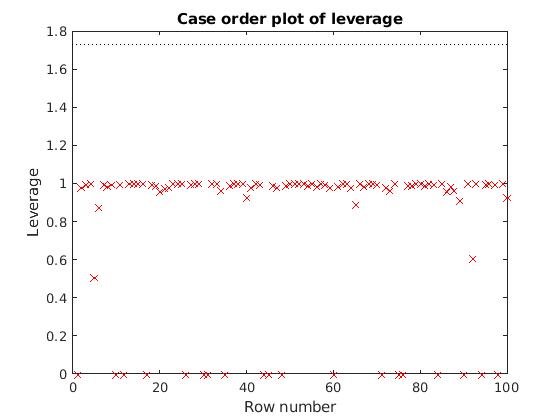

In [39]:
%% - multi-linear stepwise glm
% As at depth 10-40 cm:
y_glm       = cae(hm_eb,[10]);
iSamples    = randsample(numel(y_glm),numel(y_glm));
y_glm_tr    = y_glm(iSamples(1:100));
y_glm_te    = y_glm(iSamples(101:120));

% X
X_glm       = [COND_F(Fprof,:),RESIS_F(Fdual,:),VOIE(Farp,:)];
X_glm_tr    = X_glm(iSamples(1:100),:);
X_glm_te    = X_glm(iSamples(101:120),:);

% glm
% mdl_glm = stepwiseglm(X_glm,y_glm,'interactions');
mdl_glm     = stepwiseglm(X_glm_tr,y_glm_tr,'interactions');
[newf,newc] = predict(mdl_glm,X_glm_te);

confint = coefCI(mdl_glm)

p = coefTest(mdl_glm)

plotDiagnostics(mdl_glm,'leverage')



[betahat1,se1,pval1,inmodel1,stats1] = stepwisefit(X_glm_tr,y_glm_tr);
predict(mdl_mlr,X_glm_te)

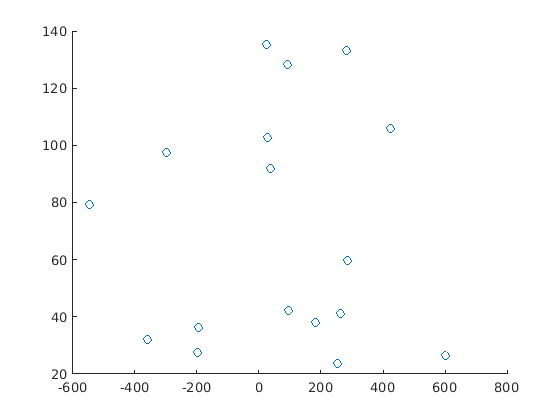

In [41]:
scatter(newf,y_glm_te)

In [36]:
help predict

 PREDICT Computes the k-step ahead prediction.
 
   YP = PREDICT(MODEL, DATA, K)
      predicts the output of an identified model MODEL K time instants
      ahead using input-output data history from DATA. The predicted
      response is computed for the time span covered by DATA.
 
      MODEL is an identified, linear or nonlinear model, such as IDSS or
      IDNLARX. If model is originally unavailable, you can estimate one
      using commands such as AR, ARMAX, TFEST, NLARX on DATA.
 
      DATA is an IDDATA object containing a record of measured input and
      output values. If MODEL is a time series model (no input signals),
      DATA must be specified as an IDDATA object with no inputs or a double
      matrix of past (already observed) time series values.
 
      K is the prediction horizon, a positive integer denoting a multiple
      of data sample time. Old outputs up to time t-K are used to predict
      the output at time instant t. All relevant inputs (times t, t-1, t-2